<a href="https://colab.research.google.com/github/yezawei/test2/blob/main/Exam_performance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Students Performance in Exams: Data Visualization


This paper aims to to analyse student's performance on exams on the following subjects: math, reading, writing. It compares grades between different genders and different groups (ethnicities). The goal is to understand how the scores are impacted based on different factors which include taking preparational course, parent's educational background, lunch. This paper aims to utilize different types of data visualisation to demonstrate the information mentioned above.


This dataset has been taken from the following link: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams  

Publisher:JAKKI SESHAPANPU

# Getting the data ready

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Check for any null values in dataset:

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Getting Familiar with the data

Explore the data based on gender and exams score for various subjects: math, writing, reading.

Let's see percentage of male and female students in this dataset:

In [5]:
sns.set(style='whitegrid')

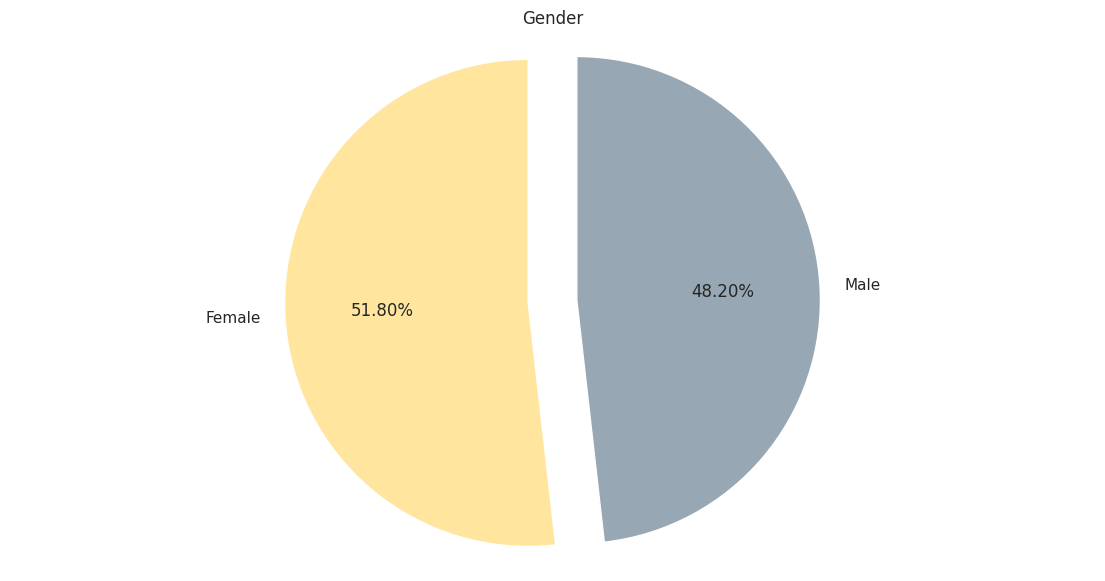

In [6]:
plt.figure(figsize=(14, 7))
labels=['Female', 'Male']
plt.pie(df['gender'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['#FFE59E','#97A7B3'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

We can see that there are 1.8% female students in this dataset than male student, but we will not consider this deviation crucial in our analysis.

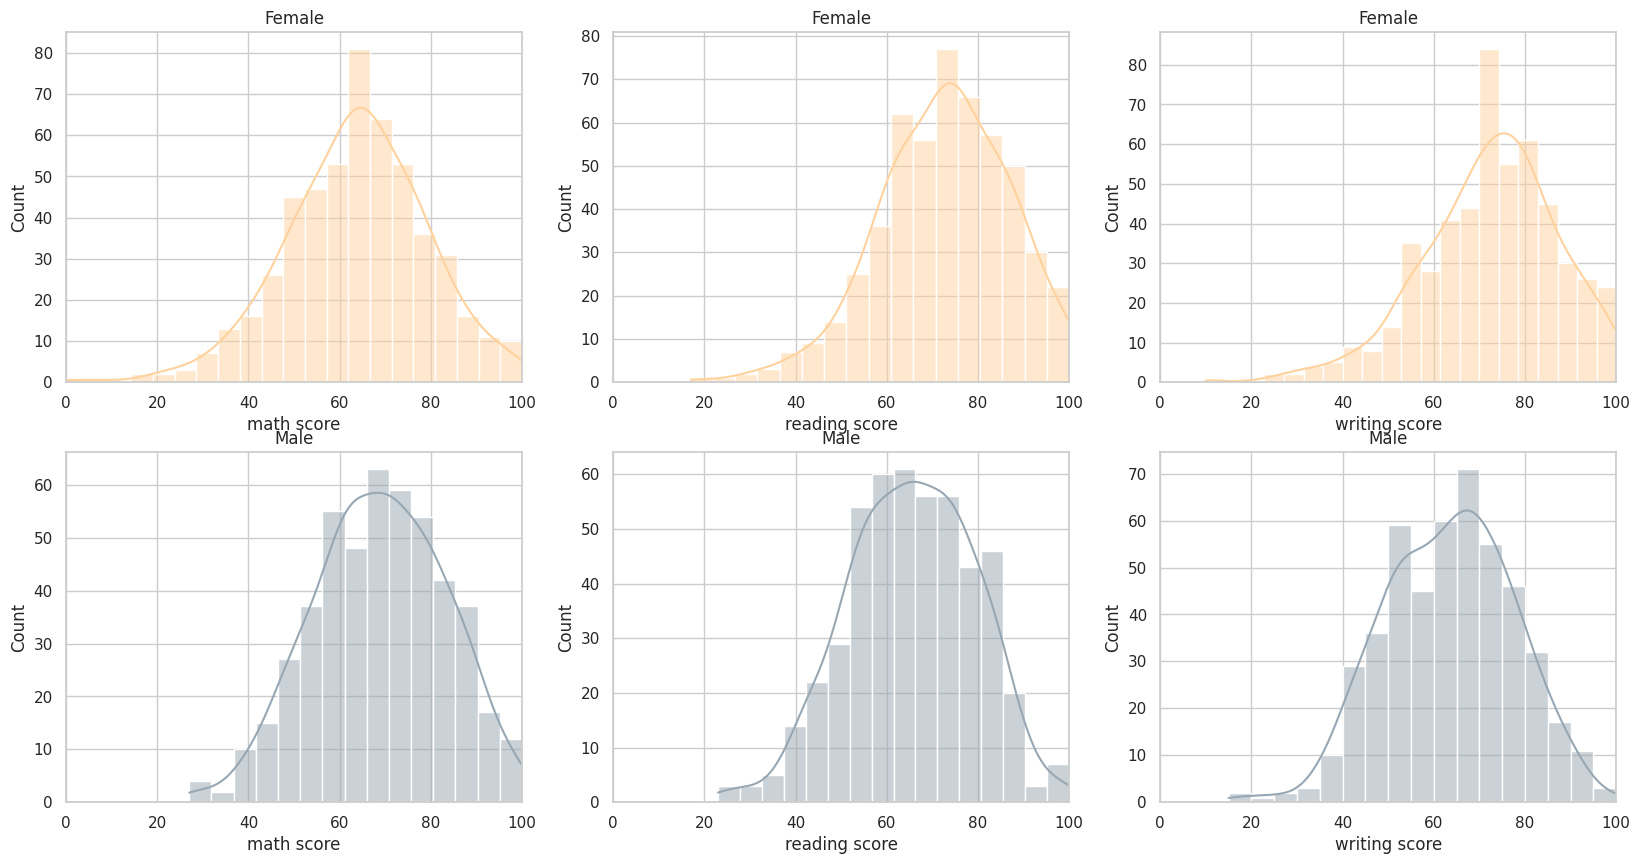

In [7]:
fig , axes = plt.subplots(2,3, figsize=(20,10))
sns.histplot(df[df['gender'] =='female']['math score'],kde=True,ax = axes[0][0],color='#FFD29D')
sns.histplot(df[df['gender'] =='female']['reading score'],kde=True,ax = axes[0][1],color='#FFD29D')
sns.histplot(df[df['gender'] =='female']['writing score'],kde=True,ax = axes[0][2],color='#FFD29D')

sns.histplot(df[df['gender'] =='male']['math score'],kde=True,ax = axes[1][0], color='#97A7B3')
sns.histplot(df[df['gender'] =='male']['reading score'],kde=True,ax = axes[1][1], color='#97A7B3')
sns.histplot(df[df['gender'] =='male']['writing score'],kde=True,ax = axes[1][2], color='#97A7B3')

for i in range(0,3):
    axes[0][i].set_title("Female")
    axes[1][i].set_title("Male")

    axes[0][i].set_xlim(0,100)
    axes[1][i].set_xlim(0,100)
plt.show()

We can see that on average male students have higher score than female students, but higher percentage of female students have secured 100% exam scores in comparison to male students

Let's have a  better idea of mean scores:

In [8]:
gender_mean = df.groupby('gender')[['math score','reading score','writing score']].mean().round(2).T
colors = {'female': '#FFD29D', 'male': '#97A7B3'}


fig = go.Figure()
for gender in gender_mean.columns:
    fig.add_trace(go.Bar(
        x=gender_mean.index,
        y=gender_mean[gender],
        name=gender,
        marker_color=colors[gender]
    ))

fig.update_layout(
    barmode='group',
    title='Mean Exam Results by Gender and Subject',
    xaxis_title='Subject',
    yaxis_title='Mean Score',
    width=800,
    height=400
)

fig.show()
pyo.iplot(fig)


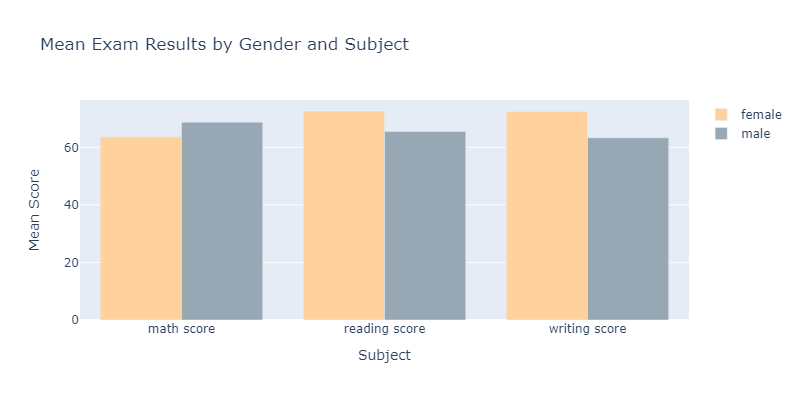

We can see that mean score for math exmam is higher for male studets than that for female student, and in a meantime mean score for both reading and writing is higher for female students

Now let's explore the corelation between gender & groups (ethnicity) and exams score for various subjects: math, writing, reading.

First, let's see persentage of different groups represented in this dataset:

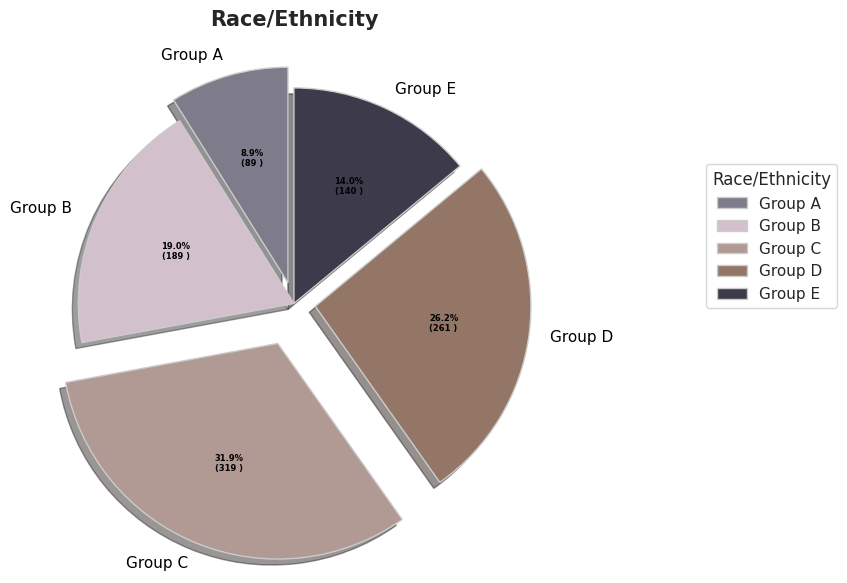

In [9]:
groups = ['Group A', 'Group B ', 'Group C',
        'Group D', 'Group E']

data = [89, 190, 319, 262, 140]

#using explode data
explode = ( 0.1, 0,0.2, 0.1, 0)

# Make a color pallette for groups
colors = (  "#7E7C8A", "#D3C0CD",
          "#B19994", "#937666", "#3D3A4B" )

wp = { 'linewidth' : 1, 'edgecolor' : "#cccccc" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

# Make plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = groups,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="#000000"))

#Legend
ax.legend(wedges, groups,
          title ="Race/Ethnicity",
          loc ="center left",
          bbox_to_anchor =(1.25, 0, 0, 1.25))

plt.setp(autotexts, size = 6, weight ="bold")
ax.set_title("Race/Ethnicity", fontsize=15, fontweight='bold')

plt.show()

We can see that group C has the most students, now let's look more into the results of female and male students within the each group, as well as results between each groups:

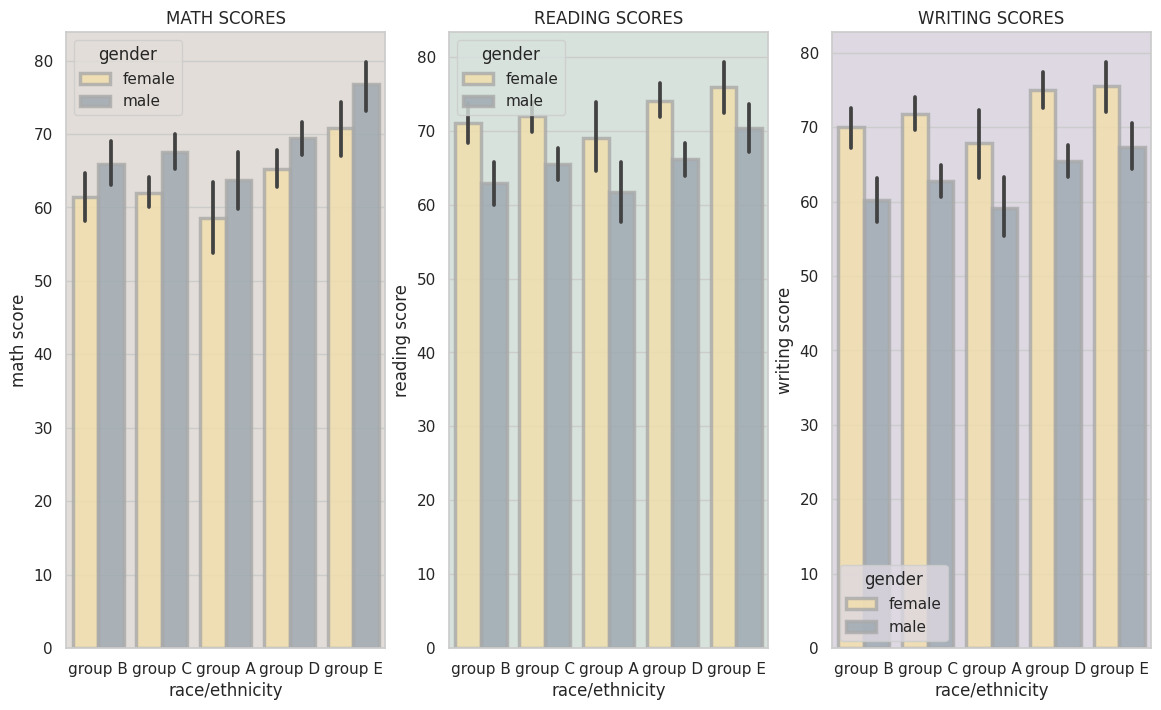

In [10]:
plt.rcParams['axes.facecolor'] = "#e2ddd8"

# Prepare color set
colors_1 = {'male': '#97A7B3', 'female': '#FFE59E'}

# Make subplots
plt.figure(figsize=(14, 8))

# Math Scores
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity', y='math score', data=df, hue='gender', palette=colors_1, edgecolor='darkgrey', **{'alpha': 0.8, 'linewidth': 2.5})

# Background color
plt.rcParams['axes.facecolor'] = "#d8e2dd"

# Reading Scores
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity', y='reading score', data=df, hue='gender', palette=colors_1, edgecolor='darkgrey', **{'alpha': 0.8, 'linewidth': 2.5})

# Background color
plt.rcParams['axes.facecolor'] = "#ddd8e2"

# Writing Scores
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity', y='writing score', data=df, hue='gender', palette=colors_1, edgecolor='darkgrey', **{'alpha': 0.8, 'linewidth': 2.5})

plt.show()

We can see how different results are for each parameter: subject score, gender, group.

# Exploring different factors that may or may not have relations with student's performance on exams.

Now let's take a look at parent's level of education and see the coration of it with student's exams score.

First of all, let's see the general degree level amongst parents:

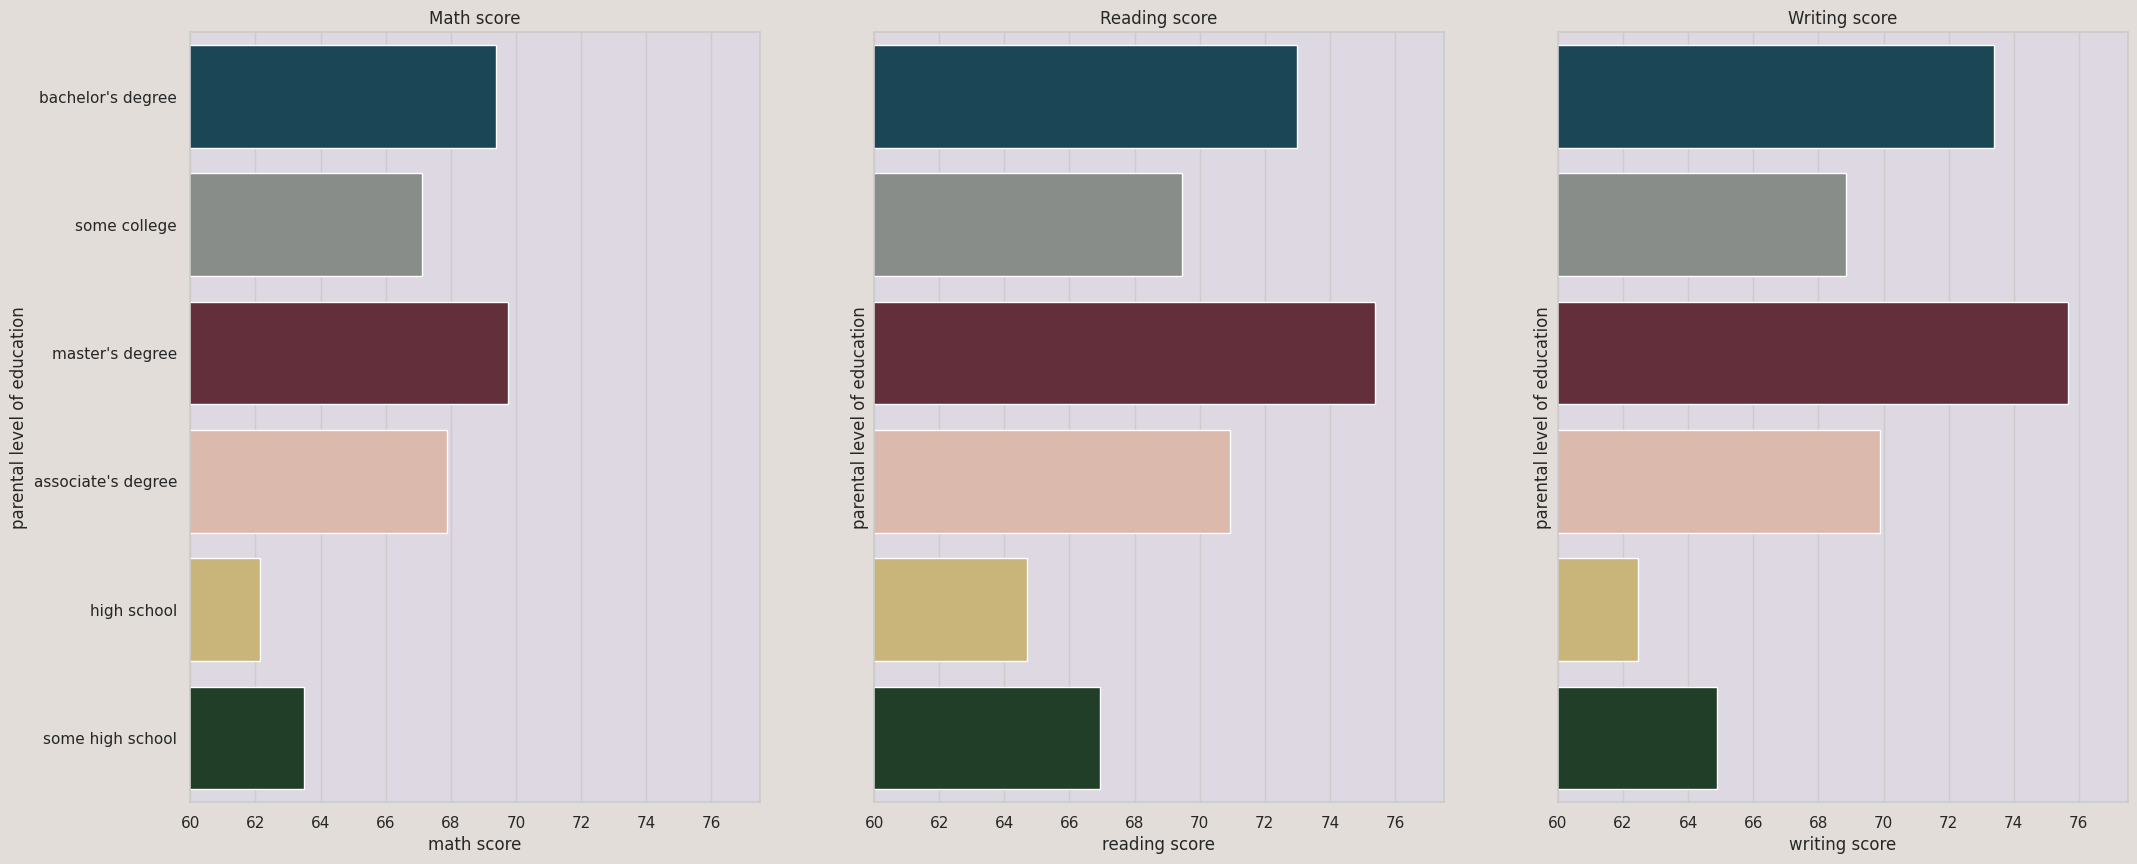

In [11]:
background_color = "#e2ddd8"
fig, axes = plt.subplots(1, 3, figsize=(25, 10), sharey=True, facecolor=background_color)

#getting colors ready
palette = {"bachelor's degree": "#114B5F",
           "some college": "#878E88",
           "master's degree": "#6B2737",
           "associate's degree": "#E3B5A4",
           "high school": "#D6BC6D",
           "some high school": "#1C4425"}

# Plot
sns.barplot(data=df, y='parental level of education', x='math score', ax=axes[0], ci=None, palette=palette)
axes[0].set_title("Math score")

sns.barplot(data=df, y='parental level of education', x='reading score', ax=axes[1], ci=None, palette=palette)
axes[1].set_title("Reading score")

sns.barplot(data=df, y='parental level of education', x='writing score', ax=axes[2], ci=None, palette=palette)
axes[2].set_title("Writing score")

#x-axis limits
for i in range(0, 3):
    axes[i].set_xlim(60, 77.5)

plt.show()

From the data represented above we can wee that students who's parents have bachelor or masters degree tend to perform better on both math, reading and writing exams in comparision to the student who's parenets have other types of degrees.

Now let's investigate correlation between students grades and whether or not they completed test preparation course

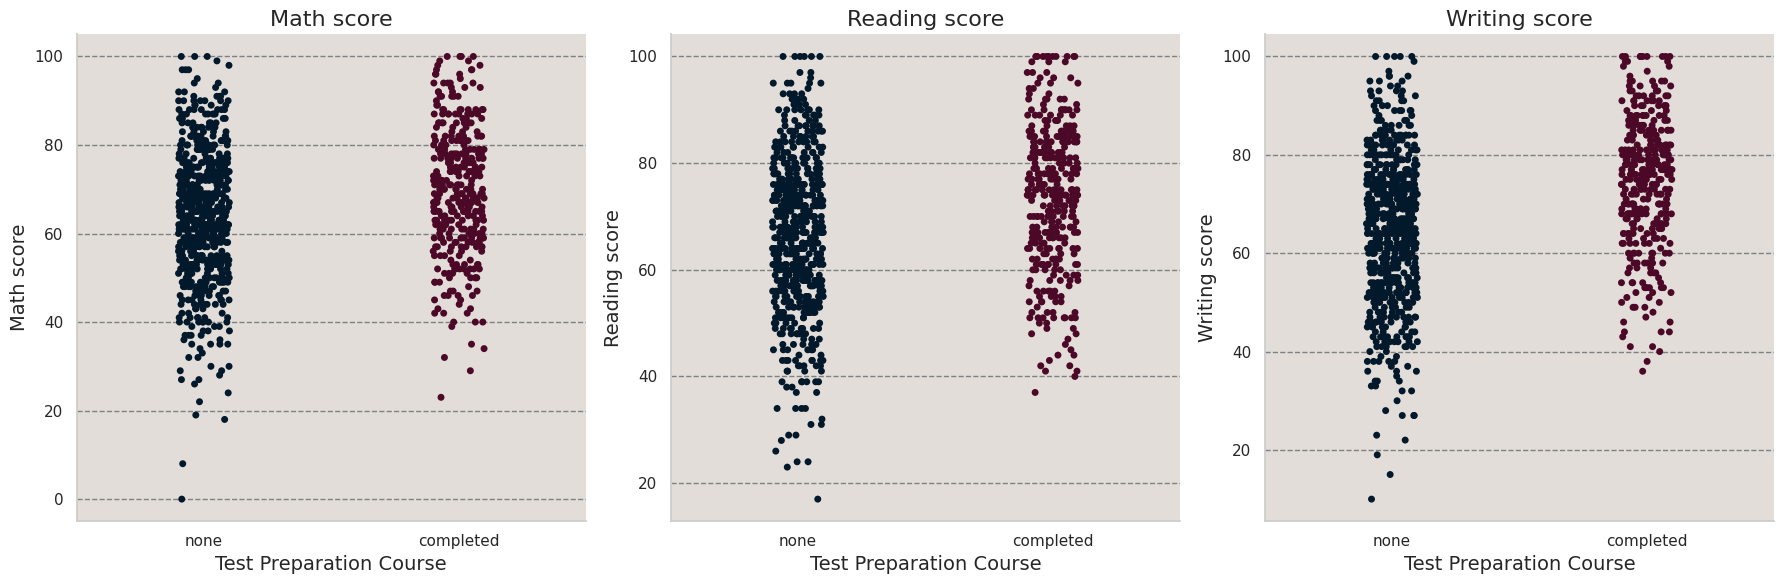

In [12]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(ncols=3, figsize=(18, 6))
background_color = "#e2ddd8"

custom_colors = ['#02182B', '#4C0827']

for ax, score_type in zip(axes, [ 'math score', 'reading score', 'writing score']):
    ax.set_facecolor(background_color)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(linestyle="--", axis='y', color='gray')

    sns.stripplot(data=df, y=score_type, x='test preparation course', palette=custom_colors, ax=ax)

    ax.set_xlabel("Test Preparation Course", fontsize=14)
    ax.set_ylabel(score_type.capitalize(), fontsize=14)
    ax.set_title(f"{score_type.capitalize()}", fontsize=16)

plt.tight_layout()
plt.show()

We can see that students who have completed test preparation course performed better than student's who haven't completed it.

Now let's take a look at lunch students are taking and its correlation with their scores:

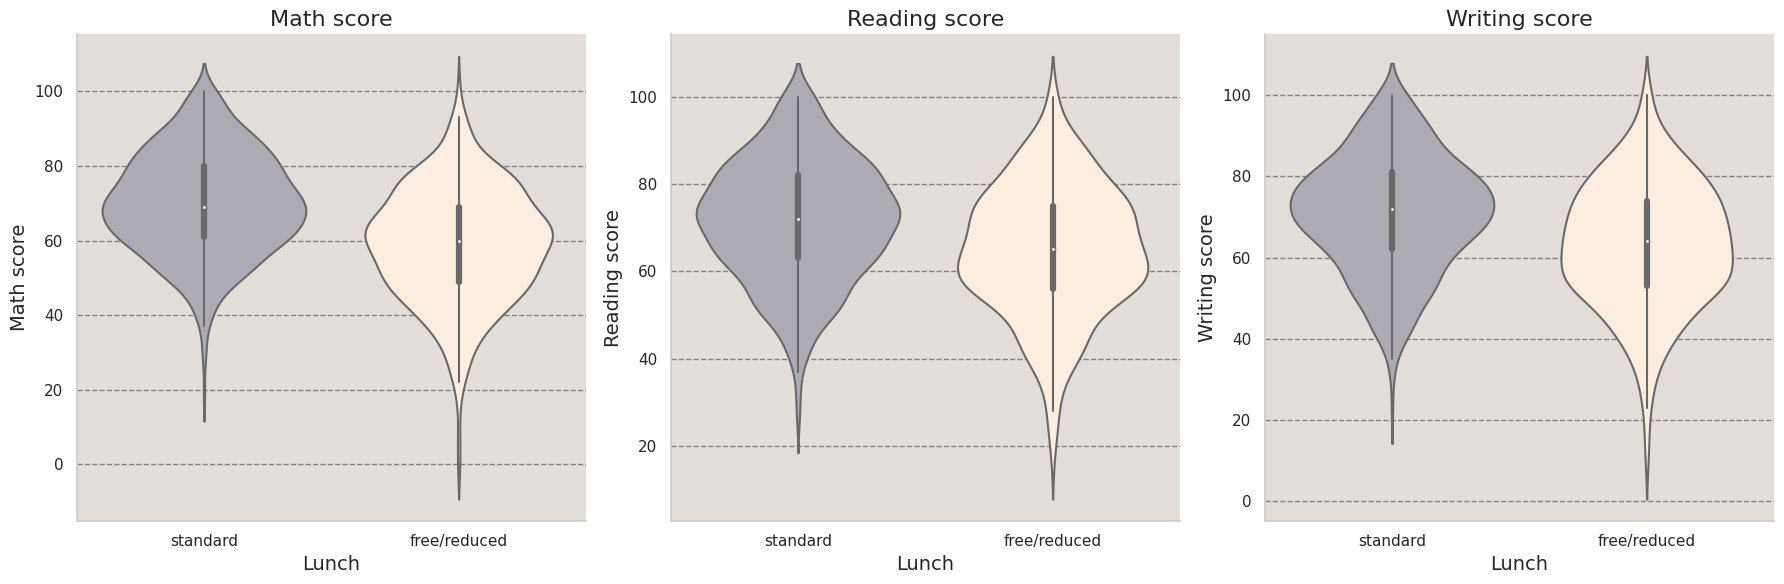

In [13]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(ncols=3, figsize=(18, 6))
background_color = "#e2ddd8"

custom_colors = ['#ADA8B6', '#FFEEDB']

for ax, score_type in zip(axes, ['math score', 'reading score', 'writing score']):
    ax.set_facecolor(background_color)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(linestyle="--", axis='y', color='gray')

    sns.violinplot(data=df, x='lunch', y=score_type, palette=custom_colors, ax=ax)

    ax.set_xlabel("Lunch", fontsize=14)
    ax.set_ylabel(score_type.capitalize(), fontsize=14)
    ax.set_title(f"{score_type.capitalize()}", fontsize=16)

plt.tight_layout()
plt.show()

Students taking standard lunch have better grades than students having free/reduced lunch.

# Conclusion:

Male students performed better on math exams, female students performed better on writing and reading exams.

Students whose parents have master's degree have performed better than others, the second best performers based on paren's educational level criteria were students who's parents had bachelor's degree.

Students with completed test preparation course performed better than students who didn't complete it.

Students with standard lunch are performing better, than students with free/reduced lunch.